In [1]:
from glob import glob
from io import StringIO
import holoviews as hv
from holoviews import opts
import numpy as np
import os
import pandas as pd
import panel as pn
import zipfile

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
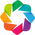

In [2]:
# Initialize HoloViews with Panel backend
hv.extension('bokeh')

In [3]:
def read_csvs_from_zips(folder_path):
    """
    Read all CSV files found within ZIP files in the specified folder.
    
    Args:
        folder_path (str): Path to the folder containing ZIP files
        
    Returns:
        dict: Dictionary with keys as 'zipfile_name/csv_name' and values as pandas DataFrames
    """
    all_dataframes = {}
    
    # Get all ZIP files in the folder
    zip_files = [f for f in os.listdir(folder_path) if f.endswith('.zip')]
    
    for zip_filename in zip_files:
        zip_path = os.path.join(folder_path, zip_filename)
        
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                # List all files in the ZIP
                for file_info in zip_ref.filelist:
                    if file_info.filename.endswith('.csv'):
                        # Read the CSV file from the ZIP
                        with zip_ref.open(file_info.filename) as csv_file:
                            # Convert bytes to string
                            csv_content = csv_file.read().decode('utf-8')
                            
                            # Read CSV content into pandas DataFrame
                            df = pd.read_csv(StringIO(csv_content))
                            
                            # Create a key combining ZIP and CSV filename
                            key = f"{zip_filename}/{file_info.filename}"
                            all_dataframes[key] = df
                            
                            print(f"Successfully read: {key}")
                            
        except Exception as e:
            print(f"Error processing {zip_filename}: {str(e)}")
    
    return all_dataframes

In [4]:
# Example usage
if __name__ == "__main__":
    # Specify the folder containing ZIP files
    folder_path = ".."
    
    # Read all CSVs from all ZIPs
    dataframes = read_csvs_from_zips(folder_path)
    
    # Process the dataframes
    for filename, df in dataframes.items():
        print(f"\nFile: {filename}")
        print("Shape:", df.shape)
        print("Columns:", df.columns.tolist())

Successfully read: QDV2020-main.zip/QDV2020-main/20201214_QDV2020COVID_001.csv
Successfully read: QDV2020-main.zip/QDV2020-main/20201214_QDV2020_001.csv
Successfully read: QDV2024-main.zip/QDV2024-main/20241216_QDV2024_001.csv
Successfully read: QDV2022-main.zip/QDV2022-main/20221213_QDV2022_001.csv
Successfully read: QDV2021-main.zip/QDV2021-main/20211213_QDV2021_001.csv
Successfully read: QDV2023-main.zip/QDV2023-main/20231204_QDV2023_001.csv

File: QDV2020-main.zip/QDV2020-main/20201214_QDV2020COVID_001.csv
Shape: (2675, 8)
Columns: ['NOME PROVINCIA (ISTAT)', 'CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)', 'DENOMINAZIONE CORRENTE', 'VALORE', 'INDICATORE', "UNITA' DI MISURA", 'FONTE']

File: QDV2020-main.zip/QDV2020-main/20201214_QDV2020_001.csv
Shape: (9630, 9)
Columns: ['NOME PROVINCIA (ISTAT)', 'CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)', 'DENOMINAZIONE CORRENTE', 'VALORE', 'INDICATORE', "UNITA' DI MISURA", 'RIFERIMENTO TEMPORALE', 'FONTE ORIGINALE']

File: 

In [27]:
for key in dataframes.keys():
    dataframes[key]['Year'] = os.path.basename(key).split('_')[1][3:]
    if 'ANNO DI RIFERIMENTO DEI DATI' in dataframes[key].columns:
        indices = dataframes[key][pd.isnull(dataframes[key]['ANNO DI RIFERIMENTO DEI DATI'])].index
        dataframes[key].loc[indices, 'ANNO DI RIFERIMENTO DEI DATI'] = dataframes[key].loc[indices, 'Year']
    else:
        dataframes[key]['ANNO DI RIFERIMENTO DEI DATI'] = dataframes[key]['Year']

In [44]:
df = pd.concat([x for x in dataframes.values()])
for cid in ['INDICATORE', 'ANNO DI RIFERIMENTO DEI DATI']:
    df[cid] = df[cid].astype(str)
# df['ANNO DI RIFERIMENTO DEI DATI'] = df['ANNO DI RIFERIMENTO DEI DATI'].astype(int)
print(df.shape)
display(df.head(3).T)

(50831, 12)


,0,1,2
NOME PROVINCIA (ISTAT),Agrigento,Alessandria,Ancona
CODICE NUTS 3 2021,ITG14,ITC18,ITI32
CODICE PROVINCIA ISTAT (STORICO),84.0,6.0,42.0
DENOMINAZIONE CORRENTE,Agrigento,Alessandria,Ancona
VALORE,-0.06544,-0.06724,-0.07925
INDICATORE,Pil pro capite,Pil pro capite,Pil pro capite
UNITA' DI MISURA,Variazione stima 2020 rispetto al 2019 (In %),Variazione stima 2020 rispetto al 2019 (In %),Variazione stima 2020 rispetto al 2019 (In %)
FONTE,Elaborazioni Il Sole 24 ORE su dati Prometeia,Elaborazioni Il Sole 24 ORE su dati Prometeia,Elaborazioni Il Sole 24 ORE su dati Prometeia
Year,2020COVID,2020COVID,2020COVID
ANNO DI RIFERIMENTO DEI DATI,2020COVID,2020COVID,2020COVID


In [45]:
# Filter to keep only true integers
def filter_true_integers(df, column_name):
    # First remove NaN values
    mask = df[column_name].notna()
    
    # Then check if values are integers
    # This will handle both native integers and integer-valued floats
    mask &= df[column_name].apply(lambda x: isinstance(x, int))
    # mask &= df[column_name].apply(lambda x: 
    #     isinstance(x, (int, np.integer)) or
    #     (isinstance(x, float) and x.is_integer())
    # )
    
    return df[mask]

In [58]:
result.dtypes

NOME PROVINCIA (ISTAT)               object
CODICE NUTS 3 2021                   object
CODICE PROVINCIA ISTAT (STORICO)    float64
DENOMINAZIONE CORRENTE               object
VALORE                              float64
INDICATORE                           object
UNITA' DI MISURA                     object
FONTE                                object
Year                                 object
ANNO DI RIFERIMENTO DEI DATI         object
RIFERIMENTO TEMPORALE                object
FONTE ORIGINALE                      object
dtype: object

In [47]:
# Apply the filter
# result = filter_true_integers(df, 'ANNO DI RIFERIMENTO DEI DATI')
result = df[df['ANNO DI RIFERIMENTO DEI DATI'] != '2020COVID']
print(result.shape)
display(result.head(3).T)

(48156, 12)


,0,1,2
NOME PROVINCIA (ISTAT),Torino,Vercelli,Novara
CODICE NUTS 3 2021,ITC11,ITC12,ITC15
CODICE PROVINCIA ISTAT (STORICO),1.0,2.0,3.0
DENOMINAZIONE CORRENTE,Torino,Vercelli,Novara
VALORE,-1.073873,-0.671578,-1.297251
INDICATORE,"Sportività 2020 - ""effetto Covid-19""","Sportività 2020 - ""effetto Covid-19""","Sportività 2020 - ""effetto Covid-19"""
UNITA' DI MISURA,Indice elaborato in base a 4 indicatori che mi...,Indice elaborato in base a 4 indicatori che mi...,Indice elaborato in base a 4 indicatori che mi...
FONTE,NaN,NaN,NaN
Year,2020,2020,2020
ANNO DI RIFERIMENTO DEI DATI,2020,2020,2020


In [48]:
# filename = '../QDV2024-main/20241216_QDV2024_001.csv'

In [49]:
# data = {}
# data[2024] = pd.read_csv(filename, sep=',')

In [50]:
# display(data[2024].head(3).T)

In [51]:
# display(data[2024][data[2024]['NOME PROVINCIA (ISTAT)'] == 'Torino'].T)

In [52]:
# for idx, grouped in data[2024].groupby(['NOME PROVINCIA (ISTAT)']):
#     print(grouped.shape)
#     print(grouped['INDICATORE'].unique())
#     display(grouped.T)
#     break

In [53]:
# ofilename = '../QDV2024-main/20241216_QDV2024_001.grouped.csv'
# grouped.to_csv(ofilename)

In [54]:
# ofilename = '../QDV2024-main/20241216_QDV2024_001.sample.csv'
# data[2024].head().to_csv(ofilename)

In [55]:
# data[2024].head(3).T)

In [81]:
"""
Updated version of the Italian Provinces Dashboard with improved axis scaling
"""

class ItalianProvincesDashboard:
    def __init__(self, data):
        """Initialize dashboard with the provided dataset."""
        self.data = data
        self.indicators = sorted(data['INDICATORE'].unique())
        
        # Create mapping of indicators to their available years
        self.indicator_years = {
            indicator: sorted(
                data[data['INDICATORE'] == indicator]['ANNO DI RIFERIMENTO DEI DATI'].unique()
            )
            for indicator in self.indicators
        }
        
    def create_bar_chart(self, indicator, year):
        """Create a bar chart showing top 20 provinces for selected indicator and year."""
        # Filter data based on selection
        filtered_data = self.data[
            (self.data['INDICATORE'] == indicator) & 
            (self.data['ANNO DI RIFERIMENTO DEI DATI'] == year)
        ]
        
        if filtered_data.empty:
            return hv.Text(0, 0, 'No data available for the selected combination')
            
        # Sort by value and get top 20 provinces
        filtered_data = filtered_data.nlargest(20, 'VALORE')
        
        # Create bar chart
        bars = hv.Bars(
            filtered_data, 
            kdims=['DENOMINAZIONE CORRENTE'], 
            vdims=['VALORE']
        ).opts(
            title=f'Top 20 Provinces by {indicator} ({year})',
            width=800,
            height=400,
            xrotation=45,
            tools=['hover'],
            color='#2b83ba',
            ylim=(filtered_data['VALORE'].min() * 0.95, 
                  filtered_data['VALORE'].max() * 1.05),  # Add 5% padding
            padding=0.1,  # Add padding around the plot
            show_grid=True,
            responsive=True,
            aspect=2,  # Control aspect ratio
            yformatter='%.1f'  # Format y-axis labels
        )
        
        return bars
    
    def create_time_series(self, indicator, provinces):
        """Create a time series comparison plot for selected provinces."""
        if not provinces:
            return hv.Text(0, 0, 'Please select at least one province')
            
        # Create a color palette for multiple provinces
        colors = ['#d7191c', '#2b83ba', '#1a9850', '#fdae61', '#756bb1', '#636363']
        
        # Initialize an empty overlay for all plots
        overlay = hv.Overlay()
        
        # Collect all values for y-axis scaling
        all_values = []
        
        for idx, province in enumerate(provinces):
            # Filter data based on selection
            filtered_data = self.data[
                (self.data['INDICATORE'] == indicator) & 
                (self.data['DENOMINAZIONE CORRENTE'] == province)
            ]
            
            if filtered_data.empty:
                continue
                
            all_values.extend(filtered_data['VALORE'].values)
            
            # Sort by year
            filtered_data = filtered_data.sort_values('ANNO DI RIFERIMENTO DEI DATI')
            
            color = colors[idx % len(colors)]  # Cycle through colors if more provinces than colors
            
            if len(filtered_data) == 1:
                # If we only have one point, create a scatter plot
                scatter = hv.Scatter(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    size=10,
                    tools=['hover']
                )
                overlay *= scatter
            else:
                # Create curve and points for this province
                curve = hv.Curve(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    tools=['hover'],
                    line_width=2
                )
                
                points = hv.Scatter(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE']
                ).opts(
                    color=color,
                    size=8,
                    tools=['hover']
                )
                
                overlay *= (curve * points)
        
        # If no valid data was found for any province
        if not len(overlay):
            return hv.Text(0, 0, 'No data available for the selected combinations')
            
        # Calculate y-axis limits with padding
        if all_values:
            y_min = min(all_values) * 0.95
            y_max = max(all_values) * 1.05
        else:
            y_min, y_max = 0, 1
            
        # Apply common options to the overlay
        overlay = overlay.opts(
            title=f'{indicator} Trends Comparison',
            width=800,
            height=400,
            legend_position='right',
            show_grid=True,
            padding=0.1,
            ylim=(y_min, y_max),
            responsive=True,
            aspect=2,
            yformatter='%.1f',
            xlabel='Year',
            ylabel='Value'
        )
        
        return overlay

    def create_dashboard(self):
        """Create the complete dashboard with all widgets and plots."""
        # Create indicator selector
        indicator_select = pn.widgets.Select(
            name='Indicator',
            options=self.indicators,
            value=self.indicators[0]
        )
        
        # Create dynamic year selector that updates based on indicator
        def get_years(indicator):
            return self.indicator_years[indicator]
            
        year_select = pn.widgets.Select(
            name='Year',
            options=get_years(self.indicators[0]),
            value=get_years(self.indicators[0])[0]
        )
        
        # Create province multi-selector
        province_select = pn.widgets.MultiSelect(
            name='Provinces',
            options=sorted([str(x) for x in self.data['DENOMINAZIONE CORRENTE'].unique()]),
            value=[self.data['DENOMINAZIONE CORRENTE'].iloc[0]],
            size=6  # Show 6 options at once
        )
        
        # Update year options when indicator changes
        def update_years(event):
            years = get_years(event.new)
            year_select.options = years
            year_select.value = years[0]
                
        indicator_select.param.watch(update_years, 'value')

        # Create dynamic plots with proper sizing mode
        @pn.depends(indicator_select.param.value, year_select.param.value)
        def get_bar_chart(indicator, year):
            plot = self.create_bar_chart(indicator, year)
            return pn.pane.HoloViews(plot, sizing_mode='stretch_width')

        @pn.depends(indicator_select.param.value, province_select.param.value)
        def get_time_series(indicator, provinces):
            plot = self.create_time_series(indicator, provinces)
            return pn.pane.HoloViews(plot, sizing_mode='stretch_width')

        # Create dashboard layout with proper sizing modes
        dashboard = pn.Column(
            pn.pane.Markdown('# Italian Provinces Life Quality Dashboard', sizing_mode='stretch_width'),
            pn.Row(
                pn.Column(
                    pn.pane.Markdown('## Controls', sizing_mode='stretch_width'),
                    indicator_select,
                    year_select,
                    province_select,
                    pn.pane.Markdown('---', sizing_mode='stretch_width'),
                    pn.pane.Markdown('### Data Info', sizing_mode='stretch_width'),
                    pn.bind(lambda i, provinces: '\n'.join([
                        f'{p}: {len(self.data[(self.data["INDICATORE"] == i) & (self.data["DENOMINAZIONE CORRENTE"] == p)])} years'
                        for p in provinces
                    ]), indicator_select, province_select),
                    width=300,
                    sizing_mode='fixed'
                ),
                pn.Column(
                    pn.pane.Markdown('## Visualizations', sizing_mode='stretch_width'),
                    get_bar_chart,
                    get_time_series,
                    width=850,
                    sizing_mode='fixed'
                ),
                sizing_mode='stretch_width'
            ),
            sizing_mode='stretch_width'
        )
        
        return dashboard

In [79]:
"""
Updated version of the Italian Provinces Dashboard with improved axis scaling
"""

class ItalianProvincesDashboard:
    def __init__(self, data):
        """Initialize dashboard with the provided dataset."""
        self.data = data
        self.indicators = sorted(data['INDICATORE'].unique())
        
        # Create mapping of indicators to their available years
        self.indicator_years = {
            indicator: sorted(
                data[data['INDICATORE'] == indicator]['ANNO DI RIFERIMENTO DEI DATI'].unique()
            )
            for indicator in self.indicators
        }
        
    def create_bar_chart(self, indicator, year):
        """Create a bar chart showing top 20 provinces for selected indicator and year."""
        # Filter data based on selection
        filtered_data = self.data[
            (self.data['INDICATORE'] == indicator) & 
            (self.data['ANNO DI RIFERIMENTO DEI DATI'] == year)
        ]
        
        if filtered_data.empty:
            return hv.Text(0, 0, 'No data available for the selected combination')
            
        # Sort by value and get top 20 provinces
        filtered_data = filtered_data.nlargest(20, 'VALORE')
        
        # Create bar chart
        bars = hv.Bars(
            filtered_data, 
            kdims=['DENOMINAZIONE CORRENTE'], 
            vdims=['VALORE']
        ).opts(
            title=f'Top 20 Provinces by {indicator} ({year})',
            xrotation=45,
            tools=['hover'],
            color='#2b83ba',
            ylim=(filtered_data['VALORE'].min() * 0.95, 
                  filtered_data['VALORE'].max() * 1.05),  # Add 5% padding
            padding=0.1,  # Add padding around the plot
            show_grid=True,
            frame_width=700,
            frame_height=350,
            yformatter='%.1f'  # Format y-axis labels
        )
        
        return bars
    
    def create_time_series(self, indicator, provinces):
        """Create a time series comparison plot for selected provinces."""
        if not provinces:
            return hv.Text(0, 0, 'Please select at least one province')
            
        # Create a color palette for multiple provinces
        colors = ['#d7191c', '#2b83ba', '#1a9850', '#fdae61', '#756bb1', '#636363']
        
        # Initialize an empty overlay for all plots
        overlay = hv.Overlay()
        
        # Collect all values for y-axis scaling
        all_values = []
        
        for idx, province in enumerate(provinces):
            # Filter data based on selection
            filtered_data = self.data[
                (self.data['INDICATORE'] == indicator) & 
                (self.data['DENOMINAZIONE CORRENTE'] == province)
            ]
            
            if filtered_data.empty:
                continue
                
            all_values.extend(filtered_data['VALORE'].values)
            
            # Sort by year
            filtered_data = filtered_data.sort_values('ANNO DI RIFERIMENTO DEI DATI')
            
            color = colors[idx % len(colors)]  # Cycle through colors if more provinces than colors
            
            if len(filtered_data) == 1:
                # If we only have one point, create a scatter plot
                scatter = hv.Scatter(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    size=10,
                    tools=['hover']
                )
                overlay *= scatter
            else:
                # Create curve and points for this province
                curve = hv.Curve(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE'],
                    label=province
                ).opts(
                    color=color,
                    tools=['hover'],
                    line_width=2
                )
                
                points = hv.Scatter(
                    filtered_data, 
                    kdims=['ANNO DI RIFERIMENTO DEI DATI'], 
                    vdims=['VALORE']
                ).opts(
                    color=color,
                    size=8,
                    tools=['hover']
                )
                
                overlay *= (curve * points)
        
        # If no valid data was found for any province
        if not len(overlay):
            return hv.Text(0, 0, 'No data available for the selected combinations')
            
        # Calculate y-axis limits with padding
        if all_values:
            y_min = min(all_values) * 0.95
            y_max = max(all_values) * 1.05
        else:
            y_min, y_max = 0, 1
            
        # Apply common options to the overlay
        overlay = overlay.opts(
            title=f'{indicator} Trends Comparison',
            legend_position='right',
            show_grid=True,
            padding=0.1,
            ylim=(y_min, y_max),
            frame_width=700,
            frame_height=350,
            yformatter='%.1f',
            xlabel='Year',
            ylabel='Value'
        )
        
        return overlay

    def create_dashboard(self):
        """Create the complete dashboard with all widgets and plots."""
        # Create indicator selector
        indicator_select = pn.widgets.Select(
            name='Indicator',
            options=self.indicators,
            value=self.indicators[0]
        )
        
        # Create dynamic year selector that updates based on indicator
        def get_years(indicator):
            return self.indicator_years[indicator]
            
        year_select = pn.widgets.Select(
            name='Year',
            options=get_years(self.indicators[0]),
            value=get_years(self.indicators[0])[0]
        )
        
        # Create province multi-selector
        province_select = pn.widgets.MultiSelect(
            name='Provinces',
            options=sorted([str(x) for x in self.data['DENOMINAZIONE CORRENTE'].unique()]),
            value=[self.data['DENOMINAZIONE CORRENTE'].iloc[0]],
            size=6  # Show 6 options at once
        )
        
        # Update year options when indicator changes
        def update_years(event):
            years = get_years(event.new)
            year_select.options = years
            year_select.value = years[0]
                
        indicator_select.param.watch(update_years, 'value')

        # Create dynamic plots with proper sizing mode
        @pn.depends(indicator_select.param.value, year_select.param.value)
        def get_bar_chart(indicator, year):
            plot = self.create_bar_chart(indicator, year)
            return pn.pane.HoloViews(plot, sizing_mode='stretch_width')

        @pn.depends(indicator_select.param.value, province_select.param.value)
        def get_time_series(indicator, provinces):
            plot = self.create_time_series(indicator, provinces)
            return pn.pane.HoloViews(plot, sizing_mode='stretch_width')

        # Create the reactive plots with proper sizing
        @pn.depends(indicator_select.param.value, year_select.param.value)
        def get_bar_chart(indicator, year):
            plot = self.create_bar_chart(indicator, year)
            return pn.pane.HoloViews(plot, min_height=400)

        @pn.depends(indicator_select.param.value, province_select.param.value)
        def get_time_series(indicator, provinces):
            plot = self.create_time_series(indicator, provinces)
            return pn.pane.HoloViews(plot, min_height=400)

        # Create dashboard layout with consistent sizing
        controls = pn.Column(
            pn.pane.Markdown('## Controls'),
            indicator_select,
            year_select,
            province_select,
            pn.pane.Markdown('---'),
            pn.pane.Markdown('### Data Info'),
            pn.bind(lambda i, provinces: '\n'.join([
                f'{p}: {len(self.data[(self.data["INDICATORE"] == i) & (self.data["DENOMINAZIONE CORRENTE"] == p)])} years'
                for p in provinces
            ]), indicator_select, province_select),
            min_width=300,
            margin=(0, 20, 0, 0)
        )

        plots = pn.Column(
            pn.pane.Markdown('## Visualizations'),
            get_bar_chart,
            get_time_series,
            sizing_mode='stretch_width'
        )

        dashboard = pn.Column(
            pn.pane.Markdown('# Italian Provinces Dashboard'),
            pn.Row(
                controls,
                plots,
                sizing_mode='stretch_width'
            ),
            sizing_mode='stretch_width'
        )
        
        return dashboard

In [82]:
def main():
    """Main function to run the dashboard."""
    # Read the CSV file
    # df = pd.read_csv('QDV_2020-2024.csv')
    
    # Create and serve the dashboard
    dashboard = ItalianProvincesDashboard(result)
    app = dashboard.create_dashboard()
    
    # Serve the dashboard
    pn.serve(app, port=5010, show=True)

if __name__ == '__main__':
    main()

Launching server at http://localhost:5010


In [37]:
# Read the CSV file
df = data[2024] # pd.read_csv(ofilename)

In [42]:
# Debug print
print("Data shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample data:", df.head(2))

# Print data info for debugging
print("Unique years in dataset:", df['ANNO DI RIFERIMENTO DEI DATI'].unique())

# Create and serve the dashboard
dashboard = ItalianProvincesDashboard(df)
app = dashboard.create_dashboard()

# Serve the dashboard
if __name__ == '__main__':
    pn.serve(app, port=5013, show=True)

Data shape: (9635, 9)

Columns: ['NOME PROVINCIA (ISTAT)', 'CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)', 'DENOMINAZIONE CORRENTE', 'VALORE', 'INDICATORE', "UNITA' DI MISURA", 'ANNO DI RIFERIMENTO DEI DATI', 'FONTE']

Sample data:   NOME PROVINCIA (ISTAT) CODICE NUTS 3 2021  CODICE PROVINCIA ISTAT (STORICO)  \
0                 Torino              ITC11                                 1   
1               Vercelli              ITC12                                 2   

  DENOMINAZIONE CORRENTE     VALORE                INDICATORE  \
0                 Torino  40.562727  Canoni medi di locazione   
1               Vercelli  18.421518  Canoni medi di locazione   

                                    UNITA' DI MISURA  \
0  Incidenza % sul reddito medio disponibile pro ...   
1  Incidenza % sul reddito medio disponibile pro ...   

     ANNO DI RIFERIMENTO DEI DATI                                      FONTE  
0  a ottobre 2024 su reddito 2022  elab. su dati Scenari immobiliari e